# README
This notebook is used to plot the error distribution of Pretrained Battery Transformer (PBT).

In [93]:
import os
import sys
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
from utils.tools import domain_average
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
from data_provider.data_split_recorder import split_recorder

In [94]:
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)

def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                 labelsize=fontsize # y轴字体大小设置
                  ) 
    ax.tick_params(axis='x',
                 labelsize=fontsize # x轴字体大小设置
                  ) 

def set_draft(the_plt, other_ax=''):
    ax = the_plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel('')
    plt.ylabel('')
    if other_ax:
        other_ax.axes.xaxis.set_ticklabels([])
        other_ax.axes.yaxis.set_ticklabels([])
        other_ax.set_ylabel('')
        other_ax.set_xlabel('')

def set_draft_fig(fig):
    for ax in fig.axes:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_ylabel('')
        ax.set_xlabel('')

In [95]:
test_seed_42_res_path = '../results/CPMLP_MIX_large_42.json'
test_seed_2021_res_path = '../results/CPMLP_MIX_large_2021.json'
test_seed_2024_res_path = '../results/CPMLP_MIX_large_2024.json'

test_seed_42_res = json.load(open(test_seed_42_res_path))
test_seed_2021_res = json.load(open(test_seed_2021_res_path))
test_seed_2024_res = json.load(open(test_seed_2024_res_path))

seed_42_res_path = '../results/CPMLP_MIX_eval_42.json'
seed_2021_res_path = '../results/CPMLP_MIX_eval_2021.json'
seed_2024_res_path = '../results/CPMLP_MIX_eval_2024.json'

seed_42_res = json.load(open(seed_42_res_path))
seed_2021_res = json.load(open(seed_2021_res_path))
seed_2024_res = json.load(open(seed_2024_res_path))

test_unique_ids_42, test_res_42 = domain_average(torch.tensor(test_seed_42_res['MIX_large']['domain_ids']), torch.tensor(test_seed_42_res['MIX_large']['mapes']), True)
test_unique_ids_2021, test_res_2021 = domain_average(torch.tensor(test_seed_2021_res['MIX_large']['domain_ids']), torch.tensor(test_seed_2021_res['MIX_large']['mapes']), True)
test_unique_ids_2024, test_res_2024 = domain_average(torch.tensor(test_seed_2024_res['MIX_large']['domain_ids']), torch.tensor(test_seed_2024_res['MIX_large']['mapes']), True)

unique_ids_42, res_42 = domain_average(torch.tensor(seed_42_res['MIX_eval']['domain_ids']), torch.tensor(seed_42_res['MIX_eval']['mapes']), True)
unique_ids_2021, res_2021 = domain_average(torch.tensor(seed_2021_res['MIX_eval']['domain_ids']), torch.tensor(seed_2021_res['MIX_eval']['mapes']), True)
unique_ids_2024, res_2024 = domain_average(torch.tensor(seed_2024_res['MIX_eval']['domain_ids']), torch.tensor(seed_2024_res['MIX_eval']['mapes']), True)

In [96]:
test_id_mapes = {}
eval_id_mapes = {}
for id in test_unique_ids_42:
    test_id_mapes[id] = np.mean([test_res_42[test_unique_ids_42==id][0], test_res_2021[test_unique_ids_2021==id][0], test_res_2024[test_unique_ids_2024==id][0]])

for id in unique_ids_42:
    eval_id_mapes[id] = np.mean([res_42[unique_ids_42==id][0], res_2021[unique_ids_2021==id][0], res_2024[unique_ids_2024==id][0]])

print(test_id_mapes)

{3.0: 0.28923583, 4.0: 0.09771504, 6.0: 0.075561754, 7.0: 0.10133368, 88.0: 0.0407925, 89.0: 0.037822753, 90.0: 0.30670932, 92.0: 0.23972577, 94.0: 0.10359339, 95.0: 0.2890848, 99.0: 1.5252312, 104.0: 0.31208846, 105.0: 0.18666808, 107.0: 0.48024654, 125.0: 0.039694663, 126.0: 0.18624751, 127.0: 0.20909096, 128.0: 0.14063305, 129.0: 0.10597583, 131.0: 0.084171705, 132.0: 0.15699442, 135.0: 0.14085375, 136.0: 0.10613799, 137.0: 0.27015093, 138.0: 0.0511596, 139.0: 0.13487701, 141.0: 0.050740033, 142.0: 0.05127963, 145.0: 0.29943, 147.0: 0.089452915, 148.0: 0.05529664, 149.0: 0.10335982, 150.0: 0.1318094, 154.0: 0.26413968, 158.0: 0.0412617, 159.0: 0.12244782, 161.0: 0.032912645, 165.0: 1.0516976, 166.0: 0.7862466, 167.0: 0.7188518, 168.0: 0.20953326, 171.0: 0.12639202, 176.0: 0.2824765, 179.0: 0.032858137, 185.0: 0.22807859, 187.0: 0.1435381, 195.0: 1.4534435, 198.0: 0.2016967, 203.0: 0.1456585, 205.0: 0.09817869, 206.0: 0.07200083, 221.0: 0.42275405, 222.0: 0.08261245, 223.0: 0.1636646

In [97]:
%matplotlib inline

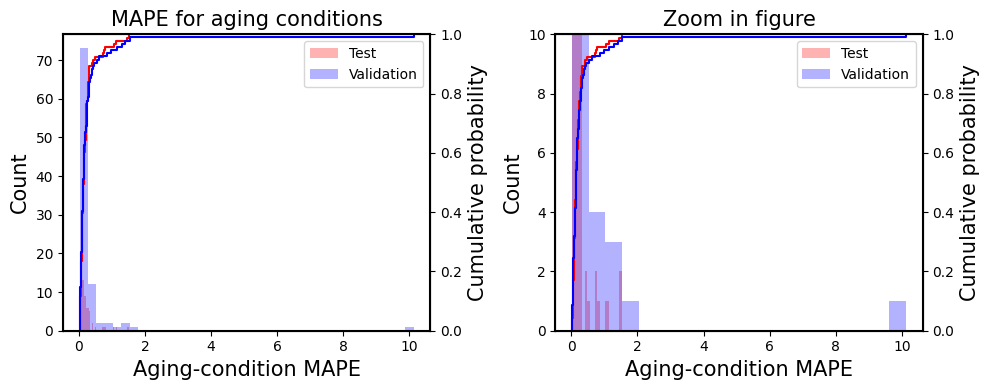

In [98]:
plt_mapes = list(test_id_mapes.values())
eval_plt_mapes = list(eval_id_mapes.values())
# plt_mapes = [i for i in plt_mapes if i <=0.4]
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(plt_mapes, bins=40, color='red', alpha=0.3, label='Test')
plt.hist(eval_plt_mapes, bins=40, color='blue', alpha=0.3, label='Validation')
plt.legend()
plt.ylabel('Count', fontsize=15)
plt.xlabel('Aging-condition MAPE', fontsize=15)
plt.title('MAPE for aging conditions', fontsize=15)
ax = plt.gca().twinx()
ax.ecdf(plt_mapes, color='red')
ax.ecdf(eval_plt_mapes, color='blue')
set_ax_linewidth(plt.gca())
ax.set_ylabel('Cumulative probability', fontsize=15)
# plt.xlim(0,0.4)
plt.subplot(1,2,2)
plt.hist(plt_mapes, bins=20, color='red', alpha=0.3, label='Test')
plt.hist(eval_plt_mapes, bins=20, color='blue', alpha=0.3, label='Validation')
plt.legend()
plt.ylabel('Count', fontsize=15)
plt.xlabel('Aging-condition MAPE', fontsize=15)
plt.ylim(0,10)
plt.title('Zoom in figure', fontsize=15)
ax = plt.gca().twinx()
ax.ecdf(plt_mapes, color='red')
ax.ecdf(eval_plt_mapes, color='blue')
set_ax_linewidth(plt.gca())
ax.set_ylabel('Cumulative probability', fontsize=15)
fig.tight_layout()
plt.show()
